The intention of this notebook is to create a concatenated dataset of the paper datasets (Merck&Co+ features) of T1626, T251 and T96 in this order. 

## Setup Notebook

### Connect to google drive: ###

In [0]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import pylab
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### Specify location of all relevant data:

In [0]:
print("Check correctnes of locations: ")
data_target_location = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T1973/paper_datasets_T1973/"
print("Folders: ")
print("\t",os.path.isdir(data_target_location))
print("Files: ")
index_T96_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T96/sequence_sampler_T96/T96_sequences_only.csv"
index_T251_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T251/sequence_sampler_T251/T251_sequences_only.csv"
index_T1626_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T1626/sequence_sampler_T1626/T1626_sequences_only.csv"

label_T96_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T96/paper_datasets_T96/y_label_xgboost_T96.csv"
label_T251_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T251/paper_datasets_T251/y_label_xgboost_T251.csv"
label_T1626_loc ="gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T1626/paper_datasets_T1626/y_label_xgboost_T1626.csv"

X_T96_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T96/paper_datasets_T96/X_paper_xgboost_T96.csv"
X_T251_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T251/paper_datasets_T251/X_paper_xgboost_T251.csv"
X_T1626_loc = "gdrive/My Drive/iGEM/Databases/Merck&Co/Data/T1626/paper_datasets_T1626/X_paper_xgboost_T1626.csv"

print("\t",os.path.isfile(index_T96_loc))
print("\t",os.path.isfile(index_T251_loc))
print("\t",os.path.isfile(index_T1626_loc))
print("\t",os.path.isfile(label_T96_loc))
print("\t",os.path.isfile(label_T251_loc))
print("\t",os.path.isfile(label_T1626_loc))
print("\t",os.path.isfile(X_T96_loc))
print("\t",os.path.isfile(X_T251_loc))
print("\t",os.path.isfile(X_T1626_loc))

Check correctnes of locations: 
Folders: 
	 True
Files: 
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True
	 True


### Specify feature types

In [0]:
########################################
target_label = 'dtm'

sequence_identity_related_columns = ['Mutation', 'dtm', 'wt', 'resi', 'mut', 'pdbId', 'protein']

features_type_A = ['beta_first', 'beta_second', 'beta_diff', 'alpha_first', 'alpha_second', 'alpha_diff', 'coil_first', 'coil_second', 'coil_diff', 'mutability_first', 'mutability_second', 'mutability_diff', 'flexibility_first', 'flexibility_second', 'flexibility_diff', 'aromatic_first', 'aromatic_second', 'aromatic_diff', 'polarity_first', 'polarity_second', 'polarity_diff', 'pi_first', 'pi_second', 'pi_diff', 'consensus_hydrophobicity_first', 'consensus_hydrophobicity_second', 'consensus_hydrophobicity_diff', 'hydrophobicity_first', 'hydrophobicity_second', 'hydrophobicity_diff', 'bulkiness_first', 'bulkiness_second', 'bulkiness_diff', 'mol_wt_first', 'mol_wt_second', 'mol_wt_diff', 'vdw_vol_first', 'vdw_vol_second', 'vdw_vol_diff', 'branched_first', 'branched_second', 'branched_diff', 'logd_first', 'logd_second', 'logd_diff', 'charge_first', 'charge_second', 'charge_diff', 'polarity2_first', 'polarity2_second', 'polarity2_diff', 'dg_o_w_first', 'dg_o_w_second', 'dg_o_w_diff']
features_type_L = ['wtss', 'totalarea', 'fractionburied', 'hydrophobicratio', 'hydrophobicarea']
# version where wtss is excluded, because its not available in all sub datasets
features_type_L_available = ['totalarea', 'fractionburied', 'hydrophobicratio', 'hydrophobicarea'] 
features_type_L = features_type_L_available #REPLACED BECAUSE NOT AVAILABLE IN 251
features_type_G = ['dmobility', 'ddipole_moment', 'dasa_vdw', 'deccen', 'dasa_hph', 'dhelicity', 'dzdipole', 'dr_solv', 'dapp_charge', 'dsed_const', 'dpi_3d', 'dzquadrupole', 'dasa_hyd', 'dzeta', 'dhenry', 'dpi_seq', 'dnet_charge', 'dvolume', 'dcoeff_fric', 'dr_gyr', 'ddebye', 'dhyd_moment', 'dcoeff_280']

feature_variant_polarity = 'variant_polarity'
features_energy_BL = ['r_bioluminate_delta_Stability_Solv_SA', 'r_bioluminate_delta_Stability_SelfCont', 'r_bioluminate_delta_Stability_Packing', 'r_bioluminate_delta_Stability_Covalent', 'r_bioluminate_delta_Stability_Reference', 'r_bioluminate_delta_Stability_vdW', 'r_bioluminate_delta_Stability_Hbond', 'r_bioluminate_delta_Stability_Coulomb', 'r_bioluminate_delta_Stability_Solv_GB', 'r_bioluminate_delta_Stability_Lipo', 'r_bioluminate_delta_Stability']
feature_energy_ddG_BL = 'r_bioluminate_delta_Stability' #PRObABLY?
features_energy_CART = ['cart_ddg', 'cart_fa_dun_dev', 'cart_cart_bonded', 'cart_fa_intra_sol_xover4', 'cart_dslf_fa13', 'cart_fa_intra_elec', 'cart_fa_dun_semi', 'cart_hbond_sr_bb', 'cart_fa_sol', 'cart_lk_ball_bridge', 'cart_rama_prepro', 'cart_hbond_sc', 'cart_hbond_lr_bb', 'cart_lk_ball_bridge_uncpl', 'cart_hbond_bb_sc', 'cart_lk_ball_iso', 'cart_fa_intra_rep_xover4', 'cart_fa_atr', 'cart_fa_rep', 'cart_lk_ball', 'cart_fa_dun_rot', 'cart_omega', 'cart_ref', 'cart_hxl_tors', 'cart_fa_intra_atr_xover4', 'cart_p_aa_pp', 'cart_fa_elec']
feature_energy_ddG_CART = 'cart_ddg'
features_energy_DS = ['ds_vdw', 'ds_elec', 'ds_entropy', 'ds_ddg', 'dS']
feature_energy_ddG_DS = 'ds_ddg'
features_energy_MOE = ['dasa', 'dEff_vdw', 'dEff_elc', 'dEsg', 'dEself', 'dh_ema', 'dh_emd', 'da_acc', 'da_don', 'da_asa_p', 'db_rotN', 'da_nH', 'dgly', 'da_heavy']
#feature_energy_ddG_MOE = #DONT KNOW REALLY?
#PROBLEM WITH MONO: DOCUMENTATION AND DATASET DONT MATCH, HOWEVER, DATASET CONSISTENT IN IT SELF
features_energy_MONO = ['mono_ddg', 'mono_fa_atr', 'mono_fa_rep', 'mono_fa_sol', 'mono_fa_intra_rep', 'mono_pro_close', 'mono_fa_pair', 'mono_hbond_sr_bb', 'mono_hbond_lr_bb', 'mono_hbond_bb_sc', 'mono_hbond_sc', 'mono_dslf_ss_dst', 'mono_dslf_cs_ang', 'mono_dslf_ss_dih', 'mono_dslf_ca_dih', 'mono_rama', 'mono_omega', 'mono_fa_dun', 'mono_p_aa_pp', 'mono_ref']
feature_energy_ddG_MONO = 'mono_ddg'

featrures_ALG_CART_tiE = features_type_A + features_type_L + features_type_G + features_energy_CART
features_all_used_by_paper = features_type_A + features_type_L + features_type_G + features_energy_BL + features_energy_CART + features_energy_DS + features_energy_MOE + features_energy_MONO
features_ALG = features_type_A + features_type_L + features_type_G 
features_E = features_energy_BL + features_energy_CART + features_energy_DS + features_energy_MOE + features_energy_MONO

HM_features = ['proteinAbbreviation', 'proteinCommon', 'Organism', 'source', 'ddG', 'delta_Tmexp', 'Tmexp_wt', 'delta_delta_Hmexp', 'delta_Hmexp_wt', 'delta_delta_CPexp', 'delta_CPexp_wt', 'delta_delta_Gexp_T_', 'T', 'Nres', 'R__A_', 'Ref_', 'pH', 'Exp_Tech_', 'wtPolarity', 'mutPolarity']
HM_feature_sequemce_Tm = 'Tmexp_wt'
HM_feature_organism_growth_T = 'T'
HM_feature_organism_pH = 'pH'
HM_feature_sequence_len = 'Nres'
HM_features_promising = [HM_feature_sequemce_Tm,HM_feature_organism_growth_T,HM_feature_organism_pH,HM_feature_sequence_len]

#features that dont make sense to use beacuase they would probably not be available beforehand:
HM_unrealistic_potentially_useful_features = ['ddG','delta_delta_Hmexp', 'delta_delta_CPexp']
#features that I dont really know what they mean
HM_potentially_useful_features = ['delta_Hmexp_wt', 'delta_CPexp_wt']

features_all_available_that_make_sense = features_all_used_by_paper + HM_features_promising

## Retrieve/Prepare/Save Data 

In [0]:
index_T96 = pd.read_csv(index_T96_loc)
index_T251 = pd.read_csv(index_T251_loc)
index_T1626 = pd.read_csv(index_T1626_loc)
label_T96 = pd.read_csv(label_T96_loc)
label_T251 = pd.read_csv(label_T251_loc)
label_T1626 = pd.read_csv(label_T1626_loc)
X_T96 = pd.read_csv(X_T96_loc)
X_T251 = pd.read_csv(X_T251_loc)
X_T1626 = pd.read_csv(X_T1626_loc)

In [0]:
index_T1626.head()

,Unnamed: 0,Mutation,base_sequence,mutated_sequence,mutation_offsets
0,0,1AKY@A@I213F,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,0
1,1,1AKY@A@N169D,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,0
2,2,1AKY@A@Q48E,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,0
3,3,1AKY@A@T110H,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,0
4,4,1AKY@A@T77H,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,SSESIRMVLIGPPGAGKGTQAPNLQERFHAAHLATGDMLRSQIAKG...,0


In [0]:
index_T251.head()

,Unnamed: 0,MUTATION,base_sequence,mutated_sequence,mutation_offsets
0,0,1ADO@A@D128A,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,0
1,1,1ADO@A@D128G,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,0
2,2,1ADO@A@D128N,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,0
3,3,1ADO@A@D128Q,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,0
4,4,1ADO@A@D128V,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,PHSHPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSI...,0


In [0]:
index_T251 = index_T251.rename(columns={"MUTATION":"Mutation"})

In [0]:
index_T96.head()

,Unnamed: 0,Mutation,base_sequence,mutated_sequence,mutation_offsets
0,0,GKR3BB@A@A158W,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,6
1,1,GKR3BB@A@D107K,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,6
2,2,GKR3BB@A@D107L,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,6
3,3,GKR3BB@A@D107R,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,6
4,4,GKR3BB@A@D134S,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,MALPTPVVICGPSGSGKTTLYNKLLKEFPGVFQLSVSHTTRQPRPG...,6


In [0]:
X_T96.head()


,alpha_diff,alpha_first,alpha_second,aromatic_diff,aromatic_first,aromatic_second,beta_diff,beta_first,beta_second,branched_diff,branched_first,branched_second,bulkiness_diff,bulkiness_first,bulkiness_second,cart_cart_bonded,cart_ddg,cart_dslf_fa13,cart_fa_atr,cart_fa_dun_dev,cart_fa_dun_rot,cart_fa_dun_semi,cart_fa_elec,cart_fa_intra_atr_xover4,cart_fa_intra_elec,cart_fa_intra_rep_xover4,cart_fa_intra_sol_xover4,cart_fa_rep,cart_fa_sol,cart_hbond_bb_sc,cart_hbond_lr_bb,cart_hbond_sc,cart_hbond_sr_bb,cart_hxl_tors,cart_lk_ball,cart_lk_ball_bridge,cart_lk_ball_bridge_uncpl,cart_lk_ball_iso,cart_omega,cart_p_aa_pp,...,mono_fa_intra_rep,mono_fa_pair,mono_fa_rep,mono_fa_sol,mono_hbond_bb_sc,mono_hbond_lr_bb,mono_hbond_sc,mono_hbond_sr_bb,mono_omega,mono_p_aa_pp,mono_pro_close,mono_rama,mono_ref,mutability_diff,mutability_first,mutability_second,pi_diff,pi_first,pi_second,polarity2_diff,polarity2_first,polarity2_second,polarity_diff,polarity_first,polarity_second,r_bioluminate_delta_stability,r_bioluminate_delta_stability_coulomb,r_bioluminate_delta_stability_covalent,r_bioluminate_delta_stability_hbond,r_bioluminate_delta_stability_lipo,r_bioluminate_delta_stability_packing,r_bioluminate_delta_stability_reference,r_bioluminate_delta_stability_selfcont,r_bioluminate_delta_stability_solv_gb,r_bioluminate_delta_stability_solv_sa,r_bioluminate_delta_stability_vdw,totalarea,vdw_vol_diff,vdw_vol_first,vdw_vol_second
0,-0.33,1.39,1.06,1,0,1,0.55,0.75,1.30,0,0,0,10.17,11.50,21.67,4.173000,6.074333,0,-15.870667,1.812667,2.289333,4.399667,2.347667,-1.763000,-0.513667,0.611000,0.775333,7.377333,3.082667,0.527000,0.000000,-1.287333,-0.382000,0.642333,-0.849000,0.067667,0.264667,-1.572667,0.013667,-0.063333,...,0.049,0.626,5.920,3.543,-1.805,-0.041,1.975,-0.053,1.060,-0.088,0.141,0.441,0.75,-82,100,18,-0.22,6.11,5.89,-2.7,8.1,5.4,2.10,0.0,2.10,464.745667,-0.462229,170.267661,0.151277,-23.082753,-1.820343e-08,9.17,0.000000,4.570107,0,304.131604,236.879,61.1,13.7,74.8
1,0.22,0.89,1.11,0,0,0,0.28,0.55,0.83,0,0,0,4.03,11.68,15.71,-0.845333,3.449667,0,-0.764333,0.473667,1.865000,-2.653000,7.095333,0.021000,0.921333,0.010333,-0.870000,-0.359333,-7.036333,1.605667,-0.106667,2.128667,0.000000,0.191000,-4.201667,0.155000,0.929667,2.374667,-0.149000,0.930333,...,0.007,0.543,-0.137,-1.569,-1.191,-0.005,-0.442,0.101,0.107,0.418,0.048,0.374,0.02,-50,106,56,6.82,2.77,9.59,-1.7,13.0,11.3,-0.20,49.7,49.50,-20.713759,23.304557,-0.464403,0.615041,6.015998,0.000000e+00,-30.85,0.000000,-18.190622,0,-1.144330,280.015,31.5,30.0,61.5
2,0.43,0.89,1.32,0,0,0,0.55,0.55,1.10,1,0,1,9.72,11.68,21.40,0.395333,-5.834667,0,-3.801333,0.035000,1.716000,-1.316000,1.133333,-0.228667,1.255333,0.074333,-0.466667,0.538000,-9.201333,-0.174667,0.080000,0.257000,0.000000,0.027333,-1.618667,0.006000,0.106667,1.849333,-0.066333,0.524000,...,-0.007,0.734,1.358,-5.339,-1.267,0.065,1.592,0.022,-0.170,0.259,0.058,0.274,0.57,-66,106,40,3.21,2.77,5.98,-8.1,13.0,4.9,-49.57,49.7,0.13,-25.069801,21.644301,3.894196,1.346660,-9.577375,0.000000e+00,-48.15,0.000000,8.028257,0,-2.255839,280.015,14.4,30.0,44.4
3,0.28,0.89,1.17,0,0,0,0.36,0.55,0.91,0,0,0,2.60,11.68,14.28,-0.912000,-1.935000,0,-5.615667,0.508333,2.050000,-2.256000,5.391333,-0.420667,1.485333,0.037333,-0.417333,-0.114333,-4.341667,1.050667,-0.003000,0.211667,0.000000,0.078000,-2.588000,0.114000,0.633333,0.676333,-0.059000,0.614333,...,-0.004,0.562,0.482,1.955,-1.476,-0.169,0.550,-0.078,0.119,0.124,0.082,0.043,-0.31,-41,106,65,8.38,2.77,11.15,-2.5,13.0,10.5,2.30,49.7,52.00,-30.009160,48.500684,5.879602,1.069529,-9.748671,-1.223739e-01,-16.18,0.000000,-54.952045,0,-4.455884,280.015,47.3,30.0,77.3
4,-0.07,0.89,0.82,0,0,0,0.30,0.55,0.85,0,0,0,-2.21,11.68,9.47,-0.235333,1.728000,0,0.845333,-0.034667,0.826333,-1.800000,1.887000,0.092333,-0.491333,-0.005000,-0.400333,-0.337667,-2.060333,0.374000,0.000000,-0.002333,0.006667,0.619333,-0.309000,0.006667,0.008667,0.791333,0.013667,0.091000,...,-0.003,0.121,0.328,-3.252,-0.076,-0.068,-0.331,0.086,-0

In [0]:
X_T251.head()

,alpha_diff,alpha_first,alpha_second,aromatic_diff,aromatic_first,aromatic_second,beta_diff,beta_first,beta_second,branched_diff,branched_first,branched_second,bulkiness_diff,bulkiness_first,bulkiness_second,cart_cart_bonded,cart_ddg,cart_dslf_fa13,cart_fa_atr,cart_fa_dun_dev,cart_fa_dun_rot,cart_fa_dun_semi,cart_fa_elec,cart_fa_intra_atr_xover4,cart_fa_intra_elec,cart_fa_intra_rep_xover4,cart_fa_intra_sol_xover4,cart_fa_rep,cart_fa_sol,cart_hbond_bb_sc,cart_hbond_lr_bb,cart_hbond_sc,cart_hbond_sr_bb,cart_hxl_tors,cart_lk_ball,cart_lk_ball_bridge,cart_lk_ball_bridge_uncpl,cart_lk_ball_iso,cart_omega,cart_p_aa_pp,...,mono_fa_intra_rep,mono_fa_pair,mono_fa_rep,mono_fa_sol,mono_hbond_bb_sc,mono_hbond_lr_bb,mono_hbond_sc,mono_hbond_sr_bb,mono_omega,mono_p_aa_pp,mono_pro_close,mono_rama,mono_ref,mutability_diff,mutability_first,mutability_second,pi_diff,pi_first,pi_second,polarity2_diff,polarity2_first,polarity2_second,polarity_diff,polarity_first,polarity_second,r_bioluminate_delta_stability,r_bioluminate_delta_stability_coulomb,r_bioluminate_delta_stability_covalent,r_bioluminate_delta_stability_hbond,r_bioluminate_delta_stability_lipo,r_bioluminate_delta_stability_packing,r_bioluminate_delta_stability_reference,r_bioluminate_delta_stability_selfcont,r_bioluminate_delta_stability_solv_gb,r_bioluminate_delta_stability_solv_sa,r_bioluminate_delta_stability_vdw,totalarea,vdw_vol_diff,vdw_vol_first,vdw_vol_second
0,0.50,0.89,1.39,0,0,0,0.20,0.55,0.75,0,0,0,-0.18,11.68,11.50,-0.327,2.470,0.0,1.268,-0.161,0.117,-1.585,-0.355,0.197,0.817,-0.026,-0.640,-0.241,-1.310,0.010,0.0,0.0,-0.080,0.000,-0.901,0.014,0.020,0.520,-0.461,1.134,...,-0.001,-0.189,0.095,-1.741,0.138,-0.060,2.665,-0.151,-0.102,0.766,-0.058,0.100,0.83,-6,106,100,3.34,2.77,6.11,-4.9,13.0,8.1,-49.70,49.7,0.00,8.651142,59.024591,5.286400,3.542588,-0.029323,0.000000,-36.41,0.000000,-22.998830,0,0.235717,189.689,-16.3,30.0,13.7
1,-0.42,0.89,0.47,0,0,0,0.10,0.55,0.65,0,0,0,-8.28,11.68,3.40,0.277,5.299,0.0,1.086,-0.296,-0.025,-1.583,0.581,0.268,1.168,-0.059,-0.734,0.268,-2.877,0.252,0.0,0.0,-0.104,0.011,-0.744,0.112,0.093,1.111,-0.051,1.875,...,-0.018,-0.338,-1.257,-6.910,0.729,0.146,2.473,0.126,0.202,0.841,-0.022,0.395,0.50,-57,106,49,3.20,2.77,5.97,-4.0,13.0,9.0,-49.70,49.7,0.00,9.998905,59.574440,1.797503,3.545229,0.897229,0.000000,-32.57,0.000000,-23.925944,0,0.680448,189.689,-26.5,30.0,3.5
2,-0.12,0.89,0.77,0,0,0,0.08,0.55,0.63,0,0,0,1.14,11.68,12.82,0.284,0.947,0.0,-0.021,-0.080,0.075,-0.243,-0.735,-0.167,0.701,0.089,-0.049,-0.176,-0.261,-0.248,0.0,0.0,0.009,0.007,-0.249,0.028,0.124,-0.043,0.103,0.197,...,0.008,-0.409,-0.117,-3.501,0.762,0.009,0.553,-0.255,-0.551,0.194,-0.036,-0.297,-0.22,28,106,134,2.64,2.77,5.41,-1.4,13.0,11.6,-46.32,49.7,3.38,6.235958,20.603743,3.228514,2.825580,0.030040,0.000000,5.31,-4.167533,-20.111146,0,-1.483240,189.689,2.7,30.0,32.7
3,0.40,0.89,1.29,0,0,0,0.21,0.55,0.76,0,0,0,2.77,11.68,14.45,-0.244,2.177,0.0,0.166,-0.143,0.120,0.661,-0.254,-0.470,0.867,0.074,-0.114,-0.348,0.256,-0.005,0.0,0.0,-0.057,0.003,-0.880,0.020,0.024,0.037,-0.230,0.822,...,0.009,-0.875,0.794,-1.456,0.007,0.014,0.720,0.078,-0.185,0.453,-0.029,-0.193,-0.30,-13,106,93,2.88,2.77,5.65,-2.5,13.0,10.5,-46.17,49.7,3.53,2.271928,8.343113,8.269074,3.266579,-0.811103,-0.173941,2.90,-0.086061,-17.284814,0,-2.150919,189.689,12.7,30.0,42.7
4,0.00,0.89,0.89,0,0,0,1.31,0.55,1.86,1,0,1,9.89,11.68,21.57,0.276,1.856,0.0,-0.489,-0.020,0.037,-1.584,-0.038,-0.084,1.502,0.093,-0.597,0.129,-1.856,-0.019,0.0,0.0,-0.056,0.009,-0.552,0.034,0.044,0.395,-0.041,0.333,...,0.025,-0.976,0.532,-2.320,0.118,0.008,1.645,0.074,-0.192,0.380,-0.026,-0.207,0.96,-32,106,74,3.19,2.77,5.96,-7.1,13.0,5.9,-49.57,49.7,0.13,7.370778,63.962126,6.895204,3.544219,-1.123189,0.000000,-44.23,0.000000,-21.965650,0,0.288068,189.689,4.1,30.0,34.1


In [0]:
X_T1626.head()

,alpha_diff,alpha_first,alpha_second,aromatic_diff,aromatic_first,aromatic_second,beta_diff,beta_first,beta_second,branched_diff,branched_first,branched_second,bulkiness_diff,bulkiness_first,bulkiness_second,cart_cart_bonded,cart_ddg,cart_dslf_fa13,cart_fa_atr,cart_fa_dun_dev,cart_fa_dun_rot,cart_fa_dun_semi,cart_fa_elec,cart_fa_intra_atr_xover4,cart_fa_intra_elec,cart_fa_intra_rep_xover4,cart_fa_intra_sol_xover4,cart_fa_rep,cart_fa_sol,cart_hbond_bb_sc,cart_hbond_lr_bb,cart_hbond_sc,cart_hbond_sr_bb,cart_hxl_tors,cart_lk_ball,cart_lk_ball_bridge,cart_lk_ball_bridge_uncpl,cart_lk_ball_iso,cart_omega,cart_p_aa_pp,...,mono_fa_intra_rep,mono_fa_pair,mono_fa_rep,mono_fa_sol,mono_hbond_bb_sc,mono_hbond_lr_bb,mono_hbond_sc,mono_hbond_sr_bb,mono_omega,mono_p_aa_pp,mono_pro_close,mono_rama,mono_ref,mutability_diff,mutability_first,mutability_second,pi_diff,pi_first,pi_second,polarity2_diff,polarity2_first,polarity2_second,polarity_diff,polarity_first,polarity_second,r_bioluminate_delta_stability,r_bioluminate_delta_stability_coulomb,r_bioluminate_delta_stability_covalent,r_bioluminate_delta_stability_hbond,r_bioluminate_delta_stability_lipo,r_bioluminate_delta_stability_packing,r_bioluminate_delta_stability_reference,r_bioluminate_delta_stability_selfcont,r_bioluminate_delta_stability_solv_gb,r_bioluminate_delta_stability_solv_sa,r_bioluminate_delta_stability_vdw,totalarea,vdw_vol_diff,vdw_vol_first,vdw_vol_second
0,-0.03,1.04,1.01,1,0,1,-0.28,1.71,1.43,-1,1,0,-1.60,21.40,19.80,4.801,6.793,0,-4.816,-0.467,0.291,1.713,-1.196,-0.740,0.359,0.053,0.368,3.990,2.873,-0.950,0.083,-1.071,0.210,-0.003,1.725,0.004,0.003,-1.320,0.178,0.012,...,0.017,0.676,1.218,0.849,-0.308,0.025,-0.004,0.580,0.510,-0.156,-0.022,0.080,0.39,-55,96,41,-0.46,5.94,5.48,0.0,5.2,5.2,0.22,0.13,0.35,57.190568,-5.247211,16.962505,0.001455,-1.780960,-0.222214,11.97,0.000000,0.048306,0,35.458685,352.854,11.7,44.4,56.1
1,0.12,0.77,0.89,0,0,0,-0.08,0.63,0.55,0,0,0,-1.14,12.82,11.68,0.777,-0.457,0,3.070,0.101,0.000,2.063,-3.592,0.233,-2.627,0.003,-0.172,0.385,0.743,-0.965,0.000,0.012,0.086,-0.001,0.419,-0.014,-0.078,0.509,0.191,-0.293,...,-0.003,-0.063,0.791,1.978,0.518,-0.215,-0.139,-0.086,-0.341,0.092,0.107,0.042,0.22,-28,134,106,-2.64,5.41,2.77,1.4,11.6,13.0,46.32,3.38,49.70,6.814512,26.015488,-2.211351,-0.703686,-0.023160,0.000000,-2.59,1.809311,-15.125860,0,-0.356230,250.477,-2.7,32.7,30.0
2,0.06,1.29,1.35,0,0,0,-0.04,0.76,0.72,0,0,0,-0.88,14.45,13.57,0.055,-1.766,0,1.427,0.114,-0.013,1.023,0.097,-0.053,-2.333,0.276,1.432,-0.057,-1.603,-0.003,0.004,1.909,0.013,0.002,-1.326,-0.069,-0.376,0.671,-0.048,-0.116,...,-0.006,-0.006,0.315,1.899,0.394,-0.122,-0.254,0.318,-0.388,-0.199,0.030,-0.266,0.16,9,93,102,-2.43,5.65,3.22,1.8,10.5,12.3,46.37,3.53,49.90,-0.244040,27.267716,5.419830,0.727414,0.396678,0.000000,-15.50,1.497642,-20.868415,0,0.815094,237.956,-2.5,42.7,40.2
3,0.16,0.76,0.92,1,0,1,-0.24,1.23,0.99,-1,1,0,-2.08,15.77,13.69,-0.046,-2.641,0,-1.560,-0.165,-0.334,1.830,-0.243,-0.317,1.461,-0.004,0.460,-0.078,0.783,0.038,-0.055,0.002,-0.008,-2.331,-0.958,0.013,0.005,-0.435,-0.030,-0.851,...,-0.011,-0.044,0.236,-0.390,-0.258,0.061,2.640,-0.148,-0.446,-0.798,-0.012,-0.199,0.83,-31,97,66,1.83,5.64,7.47,1.8,8.6,10.4,49.94,1.66,51.60,-0.677061,-8.077659,6.637486,-0.173612,0.095144,-0.715138,-2.29,4.308097,2.411324,0,-2.872702,249.997,16.6,28.5,45.1
4,0.16,0.76,0.92,1,0,1,-0.24,1.23,0.99,-1,1,0,-2.08,15.77,13.69,-0.183,-2.529,0,-3.646,0.198,-0.155,2.335,0.869,-0.278,-0.251,-0.109,0.493,0.383,2.272,0.001,0.000,-1.268,-0.127,-2.303,0.401,0.005,-0.005,-1.282,-0.314,0.003,...,-0.013,0.222,0.642,1.757,-0.148,0.085,0.106,0.380,-0.277,-0.191,-0.010,-0.070,0.83,-31,97,66,1.83,5.64,7.47,1.8,8.6,10.4,49.94,1.66,51.60,-2.417276,-4.684038,2.152989,0.008213,0.528266,-0.004608,0.23,3.777104,-1.869512,0,-2.555690,204.059,16.6,28.5,45.1


**Prepare data**

In [0]:
X_1973 = pd.concat([X_T1626, X_T251, X_T96], axis=0)
y_1973 = pd.concat([label_T1626, label_T251, label_T96], axis=0)
index_1973 = pd.concat([index_T1626[["Mutation"]], index_T251[["Mutation"]], index_T96[["Mutation"]]], axis=0)

In [0]:
index_1973.shape

(1973, 1)

In [0]:
index_1973.head()

,Mutation
0,1AKY@A@I213F
1,1AKY@A@N169D
2,1AKY@A@Q48E
3,1AKY@A@T110H
4,1AKY@A@T77H


In [0]:
y_1973.values.shape

(1973, 1)

In [0]:
X_1973.values.shape

(1973, 158)

**Visualize distribution of dTm**


In [0]:
def plot_hist_label(y_label, x1, y1, title, save_loc):
    sns.set()
    pylab.rc('font', family="Sans", size=16)
    fig, ax = plt.subplots(1, 1, figsize=(7,6.5))
    y_label.plot(kind="hist",title=title, color=["lightslategray"], grid=True, fontsize=14, ax=ax, rot=45, bins=np.arange(-21,17.5,1.5), xticks=np.arange(-21,17.5,1.5))
    ax.set_ylabel(y1)
    ax.set_xlabel(x1)
    plt.tight_layout()
    for label in ax.xaxis.get_ticklabels()[1::2]:
      label.set_visible(False)
    plt.savefig(save_loc, dpi=300)
    plt.show()

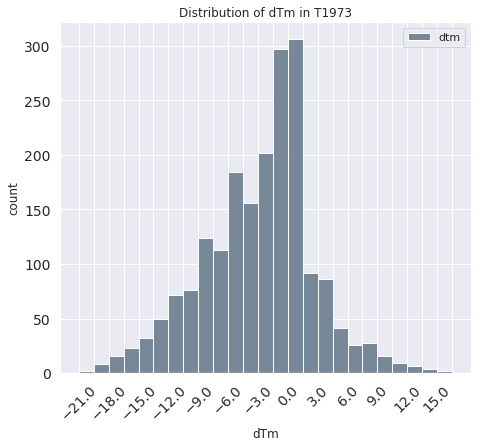

In [0]:
plot_hist_label(y_1973,"dTm", "count", "Distribution of dTm in T1973", data_target_location+"distribution_of_dTm_T1973.png")

**Make ALG subset**

In [0]:
print(features_ALG)

['beta_first', 'beta_second', 'beta_diff', 'alpha_first', 'alpha_second', 'alpha_diff', 'coil_first', 'coil_second', 'coil_diff', 'mutability_first', 'mutability_second', 'mutability_diff', 'flexibility_first', 'flexibility_second', 'flexibility_diff', 'aromatic_first', 'aromatic_second', 'aromatic_diff', 'polarity_first', 'polarity_second', 'polarity_diff', 'pi_first', 'pi_second', 'pi_diff', 'consensus_hydrophobicity_first', 'consensus_hydrophobicity_second', 'consensus_hydrophobicity_diff', 'hydrophobicity_first', 'hydrophobicity_second', 'hydrophobicity_diff', 'bulkiness_first', 'bulkiness_second', 'bulkiness_diff', 'mol_wt_first', 'mol_wt_second', 'mol_wt_diff', 'vdw_vol_first', 'vdw_vol_second', 'vdw_vol_diff', 'branched_first', 'branched_second', 'branched_diff', 'logd_first', 'logd_second', 'logd_diff', 'charge_first', 'charge_second', 'charge_diff', 'polarity2_first', 'polarity2_second', 'polarity2_diff', 'dg_o_w_first', 'dg_o_w_second', 'dg_o_w_diff', 'totalarea', 'fractionbu

In [0]:
X_1973_ALG = X_1973[features_ALG]

In [0]:
X_1973_ALG.head()

,beta_first,beta_second,beta_diff,alpha_first,alpha_second,alpha_diff,coil_first,coil_second,coil_diff,mutability_first,mutability_second,mutability_diff,flexibility_first,flexibility_second,flexibility_diff,aromatic_first,aromatic_second,aromatic_diff,polarity_first,polarity_second,polarity_diff,pi_first,pi_second,pi_diff,consensus_hydrophobicity_first,consensus_hydrophobicity_second,consensus_hydrophobicity_diff,hydrophobicity_first,hydrophobicity_second,hydrophobicity_diff,bulkiness_first,bulkiness_second,bulkiness_diff,mol_wt_first,mol_wt_second,mol_wt_diff,vdw_vol_first,vdw_vol_second,vdw_vol_diff,branched_first,...,branched_diff,logd_first,logd_second,logd_diff,charge_first,charge_second,charge_diff,polarity2_first,polarity2_second,polarity2_diff,dg_o_w_first,dg_o_w_second,dg_o_w_diff,totalarea,fractionburied,hydrophobicratio,hydrophobicarea,dmobility,ddipole_moment,dasa_vdw,deccen,dasa_hph,dhelicity,dzdipole,dr_solv,dapp_charge,dsed_const,dpi_3d,dzquadrupole,dasa_hyd,dzeta,dhenry,dpi_seq,dnet_charge,dvolume,dcoeff_fric,dr_gyr,ddebye,dhyd_moment,dcoeff_280
0,1.71,1.43,-0.28,1.04,1.01,-0.03,0.59,0.76,0.17,96,41,-55,0.46,0.31,-0.15,0,1,1,0.13,0.35,0.22,5.94,5.48,-0.46,1.38,1.19,-0.19,0.60,0.50,-0.10,21.40,19.80,-1.60,131,165,34,44.4,56.1,11.7,1,...,-1,-0.03,-0.04,-0.01,0,0,0,5.2,5.2,0.0,3.15,2.87,-0.28,352.854,0.998914,0.616326,217.473,0.007085,-3.832620,39.480976,0.002275,2.155712,0.000000,-5.480000e-16,0.008767,0.001330,2.670000e-16,0.000000,-0.029155,38.739567,0.013673,0.000002,0.000000,0.001552,20.000,1.470000e-14,0.012932,0,-1.119649,0
1,0.63,0.55,-0.08,0.77,0.89,0.12,1.39,1.33,-0.06,134,106,-28,0.46,0.51,0.05,0,0,0,3.38,49.70,46.32,5.41,2.77,-2.64,-0.78,-0.90,-0.12,0.12,0.15,0.03,12.82,11.68,-1.14,132,133,1,32.7,30.0,-2.7,0,...,0,-2.41,-2.60,-0.19,0,-1,-1,11.6,13.0,1.4,0.09,0.66,0.57,250.477,0.742086,0.108952,27.290,-3.865919,-15.236401,-7.408062,0.000028,30.162779,0.000000,3.630000e-15,0.006669,-0.937366,-7.380000e-17,-0.322266,0.305932,-36.992737,-7.451839,0.000001,-0.270508,-1.160155,-10.000,1.120000e-14,-0.000566,0,0.074298,0
2,0.76,0.72,-0.04,1.29,1.35,0.06,0.89,0.86,-0.03,93,102,9,0.49,0.50,0.01,0,0,0,3.53,49.90,46.37,5.65,3.22,-2.43,-0.85,-0.74,0.11,0.07,0.18,0.11,14.45,13.57,-0.88,146,147,1,42.7,40.2,-2.5,0,...,0,-2.05,-2.47,-0.42,0,-1,-1,10.5,12.3,1.8,0.00,0.67,0.67,237.956,0.569958,0.182076,43.326,-3.888959,-20.417690,35.056740,-0.002507,44.527920,0.000000,4.190000e-16,0.025948,-0.942892,-2.870000e-16,-0.322266,0.301765,-14.025524,-7.496252,0.000006,-0.270508,-1.167818,-5.125,4.350000e-14,-0.005596,0,0.313366,0
3,1.23,0.99,-0.24,0.76,0.92,0.16,1.07,1.07,0.00,97,66,-31,0.44,0.32,-0.12,0,1,1,1.66,51.60,49.94,5.64,7.47,1.83,-0.05,-0.40,-0.35,0.23,0.17,-0.06,15.77,13.69,-2.08,119,155,36,28.5,45.1,16.6,1,...,-1,-1.57,-1.70,-0.13,0,1,1,8.6,10.4,1.8,0.07,0.87,0.80,249.997,0.777800,0.284715,71.178,0.300104,-1.997691,-34.016262,-0.001643,15.222980,0.458716,6.710000e-16,0.006409,0.072147,3.160000e-16,0.073242,-0.027717,-63.688221,0.578496,0.000001,0.117188,0.089090,30.875,1.080000e-14,0.003547,0,-13.536678,0
4,1.23,0.99,-0.24,0.76,0.92,0.16,1.07,1.07,0.00,97,66,-31,0.44,0.32,-0.12,0,1,1,1.66,51.60,49.94,5.64,7.47,1.83,-0.05,-0.40,-0.35,0.23,0.17,-0.06,15.77,13.69,-2.08,119,155,36,28.5,45.1,16.6,1,...,-1,-1.57,-1.70,-0.13,0,1,1,8.6,10.4,1.8,0.07,0.87,0.80,204.059,0.573887,0.179232,36.574,0.283913,4.563400,-15.170681,-0.001575,29.778959,0.000000,-1.270000e-15,0.043922,0.067144,-9.800000e-17,0.073242,-0.026627,-57.067303,0.547331,0.000010,0.117188,0.082780,29.625,7.370000e-14,0.000326,0,3.097733,0


**Make ALG_Cart-tiE subset**

In [0]:
print(featrures_ALG_CART_tiE)

['beta_first', 'beta_second', 'beta_diff', 'alpha_first', 'alpha_second', 'alpha_diff', 'coil_first', 'coil_second', 'coil_diff', 'mutability_first', 'mutability_second', 'mutability_diff', 'flexibility_first', 'flexibility_second', 'flexibility_diff', 'aromatic_first', 'aromatic_second', 'aromatic_diff', 'polarity_first', 'polarity_second', 'polarity_diff', 'pi_first', 'pi_second', 'pi_diff', 'consensus_hydrophobicity_first', 'consensus_hydrophobicity_second', 'consensus_hydrophobicity_diff', 'hydrophobicity_first', 'hydrophobicity_second', 'hydrophobicity_diff', 'bulkiness_first', 'bulkiness_second', 'bulkiness_diff', 'mol_wt_first', 'mol_wt_second', 'mol_wt_diff', 'vdw_vol_first', 'vdw_vol_second', 'vdw_vol_diff', 'branched_first', 'branched_second', 'branched_diff', 'logd_first', 'logd_second', 'logd_diff', 'charge_first', 'charge_second', 'charge_diff', 'polarity2_first', 'polarity2_second', 'polarity2_diff', 'dg_o_w_first', 'dg_o_w_second', 'dg_o_w_diff', 'totalarea', 'fractionbu

In [0]:
X_1973_ALG_CART_tiE = X_1973[featrures_ALG_CART_tiE]

In [0]:
X_1973_ALG_CART_tiE.head()

,beta_first,beta_second,beta_diff,alpha_first,alpha_second,alpha_diff,coil_first,coil_second,coil_diff,mutability_first,mutability_second,mutability_diff,flexibility_first,flexibility_second,flexibility_diff,aromatic_first,aromatic_second,aromatic_diff,polarity_first,polarity_second,polarity_diff,pi_first,pi_second,pi_diff,consensus_hydrophobicity_first,consensus_hydrophobicity_second,consensus_hydrophobicity_diff,hydrophobicity_first,hydrophobicity_second,hydrophobicity_diff,bulkiness_first,bulkiness_second,bulkiness_diff,mol_wt_first,mol_wt_second,mol_wt_diff,vdw_vol_first,vdw_vol_second,vdw_vol_diff,branched_first,...,dpi_3d,dzquadrupole,dasa_hyd,dzeta,dhenry,dpi_seq,dnet_charge,dvolume,dcoeff_fric,dr_gyr,ddebye,dhyd_moment,dcoeff_280,cart_ddg,cart_fa_dun_dev,cart_cart_bonded,cart_fa_intra_sol_xover4,cart_dslf_fa13,cart_fa_intra_elec,cart_fa_dun_semi,cart_hbond_sr_bb,cart_fa_sol,cart_lk_ball_bridge,cart_rama_prepro,cart_hbond_sc,cart_hbond_lr_bb,cart_lk_ball_bridge_uncpl,cart_hbond_bb_sc,cart_lk_ball_iso,cart_fa_intra_rep_xover4,cart_fa_atr,cart_fa_rep,cart_lk_ball,cart_fa_dun_rot,cart_omega,cart_ref,cart_hxl_tors,cart_fa_intra_atr_xover4,cart_p_aa_pp,cart_fa_elec
0,1.71,1.43,-0.28,1.04,1.01,-0.03,0.59,0.76,0.17,96,41,-55,0.46,0.31,-0.15,0,1,1,0.13,0.35,0.22,5.94,5.48,-0.46,1.38,1.19,-0.19,0.60,0.50,-0.10,21.40,19.80,-1.60,131,165,34,44.4,56.1,11.7,1,...,0.000000,-0.029155,38.739567,0.013673,0.000002,0.000000,0.001552,20.000,1.470000e-14,0.012932,0,-1.119649,0,6.793,-0.467,4.801,0.368,0.0,0.359,1.713,0.210,2.873,0.004,0.389,-1.071,0.083,0.003,-0.950,-1.320,0.053,-4.816,3.990,1.725,0.291,0.178,0.307,-0.003,-0.740,0.012,-1.196
1,0.63,0.55,-0.08,0.77,0.89,0.12,1.39,1.33,-0.06,134,106,-28,0.46,0.51,0.05,0,0,0,3.38,49.70,46.32,5.41,2.77,-2.64,-0.78,-0.90,-0.12,0.12,0.15,0.03,12.82,11.68,-1.14,132,133,1,32.7,30.0,-2.7,0,...,-0.322266,0.305932,-36.992737,-7.451839,0.000001,-0.270508,-1.160155,-10.000,1.120000e-14,-0.000566,0,0.074298,0,-0.457,0.101,0.777,-0.172,0.0,-2.627,2.063,0.086,0.743,-0.014,0.130,0.012,0.000,-0.078,-0.965,0.509,0.003,3.070,0.385,0.419,0.000,0.191,-1.435,-0.001,0.233,-0.293,-3.592
2,0.76,0.72,-0.04,1.29,1.35,0.06,0.89,0.86,-0.03,93,102,9,0.49,0.50,0.01,0,0,0,3.53,49.90,46.37,5.65,3.22,-2.43,-0.85,-0.74,0.11,0.07,0.18,0.11,14.45,13.57,-0.88,146,147,1,42.7,40.2,-2.5,0,...,-0.322266,0.301765,-14.025524,-7.496252,0.000006,-0.270508,-1.167818,-5.125,4.350000e-14,-0.005596,0,0.313366,0,-1.766,0.114,0.055,1.432,0.0,-2.333,1.023,0.013,-1.603,-0.069,-0.248,1.909,0.004,-0.376,-0.003,0.671,0.276,1.427,-0.057,-1.326,-0.013,-0.048,-2.546,0.002,-0.053,-0.116,0.097
3,1.23,0.99,-0.24,0.76,0.92,0.16,1.07,1.07,0.00,97,66,-31,0.44,0.32,-0.12,0,1,1,1.66,51.60,49.94,5.64,7.47,1.83,-0.05,-0.40,-0.35,0.23,0.17,-0.06,15.77,13.69,-2.08,119,155,36,28.5,45.1,16.6,1,...,0.073242,-0.027717,-63.688221,0.578496,0.000001,0.117188,0.089090,30.875,1.080000e-14,0.003547,0,-13.536678,0,-2.641,-0.165,-0.046,0.460,0.0,1.461,1.830,-0.008,0.783,0.013,-0.452,0.002,-0.055,0.005,0.038,-0.435,-0.004,-1.560,-0.078,-0.958,-0.334,-0.030,0.633,-2.331,-0.317,-0.851,-0.243
4,1.23,0.99,-0.24,0.76,0.92,0.16,1.07,1.07,0.00,97,66,-31,0.44,0.32,-0.12,0,1,1,1.66,51.60,49.94,5.64,7.47,1.83,-0.05,-0.40,-0.35,0.23,0.17,-0.06,15.77,13.69,-2.08,119,155,36,28.5,45.1,16.6,1,...,0.073242,-0.026627,-57.067303,0.547331,0.000010,0.117188,0.082780,29.625,7.370000e-14,0.000326,0,3.097733,0,-2.529,0.198,-0.183,0.493,0.0,-0.251,2.335,-0.127,2.272,0.005,-0.199,-1.268,0.000,-0.005,0.001,-1.282,-0.109,-3.646,0.383,0.401,-0.155,-0.314,0.633,-2.303,-0.278,0.003,0.869


**Save data:**

In [0]:
X_1973.to_csv(data_target_location+"X_paper_xgboost_T1973.csv", index=False)

In [0]:
y_1973.to_csv(data_target_location+"y_label_xgboost_T1973.csv", index=False)

In [0]:
index_1973.to_csv(data_target_location+"index_xgboost_T1973.csv", index=False)

In [0]:
X_1973_ALG.to_csv(data_target_location+"X_ALG_xgboost_T1973.csv", index=False)

In [0]:
X_1973_ALG_CART_tiE.to_csv(data_target_location+"X_ALG_Cart-tiE_xgboost_T1973.csv", index=False)